## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [3]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [7]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)
regr_3 = DecisionTreeRegressor(max_depth=2)
regr_4 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_test, y_test)
regr_4.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=8)

In [8]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O R-quadrado da árvore de treinamento com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore de treinamento com profundidade=2 é: 0,71
O MSE da árvore de treinamento com profundidade=8 é: 0,98


In [9]:
mse3 = regr_3.score(X_test, y_test)
mse4 = regr_4.score(X_test, y_test)

template = "O R-quadrado da árvore de teste com profundidade={0} é: {1:.2f}"

print(template.format(regr_3.get_depth(),mse3).replace(".",","))
print(template.format(regr_4.get_depth(),mse4).replace(".",","))

O MSE da árvore de teste com profundidade=2 é: 0,69
O MSE da árvore de teste com profundidade=8 é: 0,99


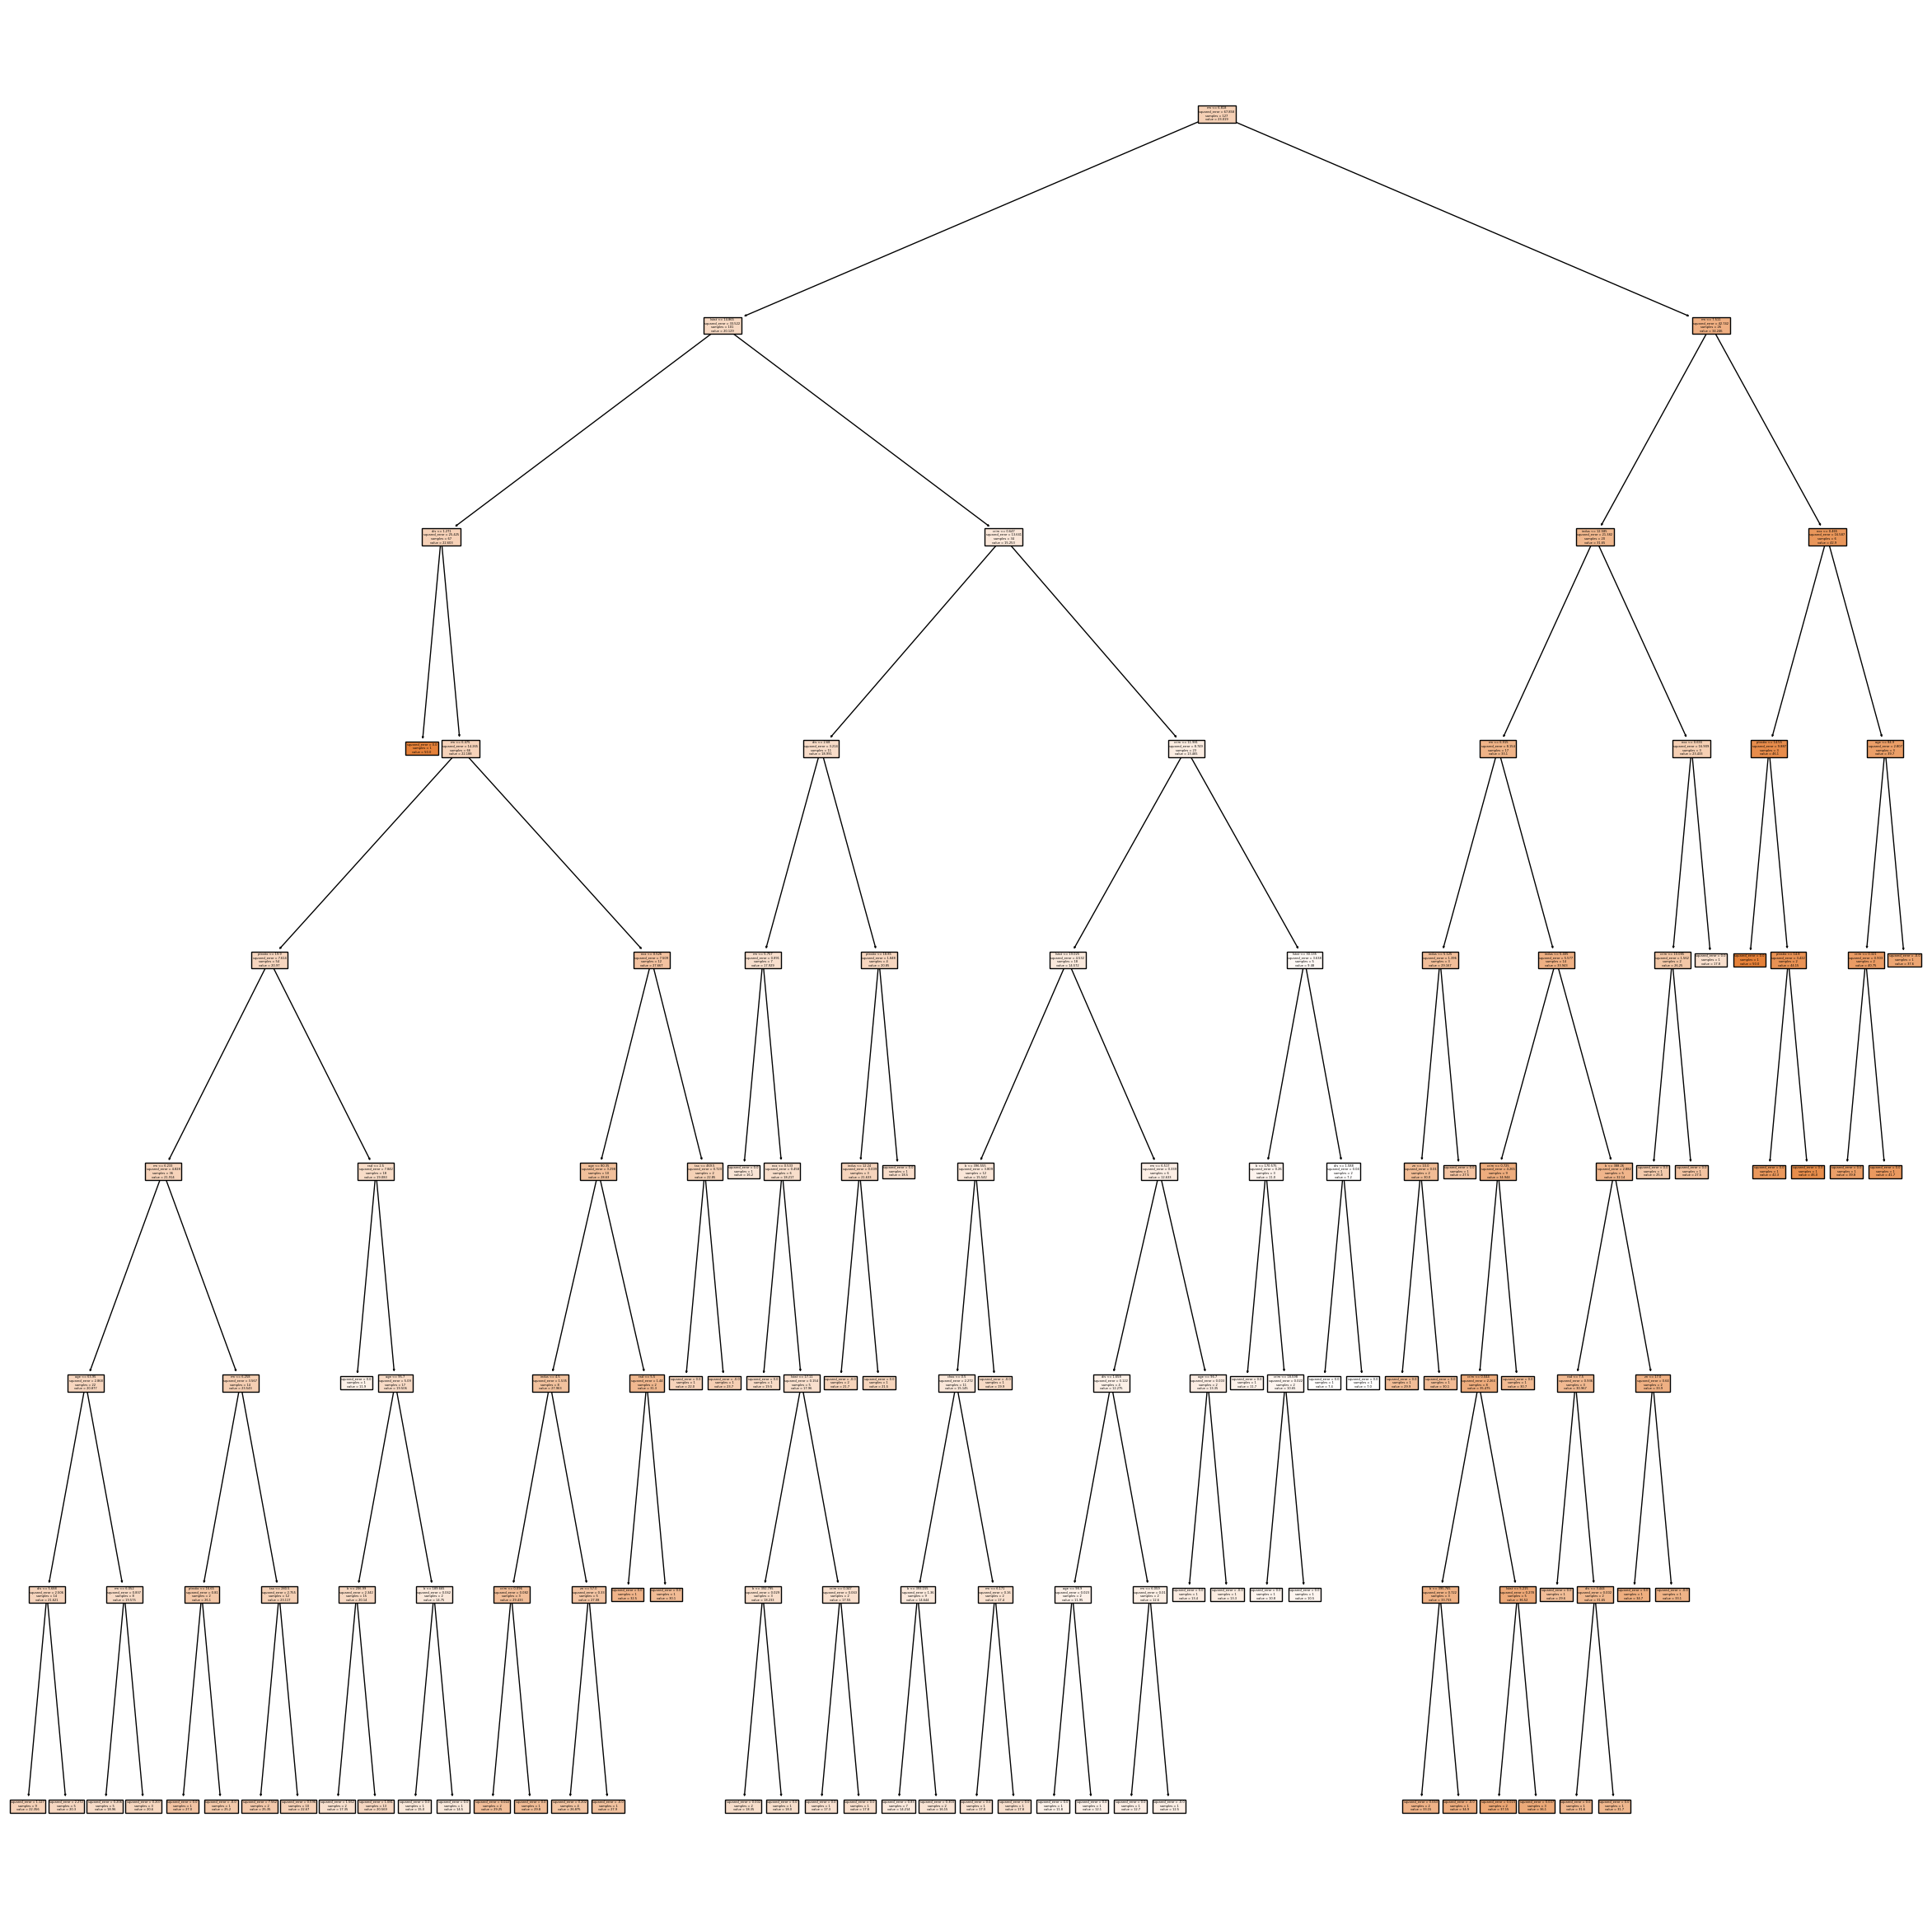

In [10]:
plt.rc('figure', figsize=(30, 30))
tp = tree.plot_tree(regr_4,
                    feature_names=X.columns,
                    filled=True)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [11]:
path = regr_4.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.39972217e-15, 1.31926121e-05, 1.18733509e-04,
        2.11081794e-04, 3.29815303e-04, 3.29815303e-04, 3.29815303e-04,
        5.32102023e-04, 6.46437995e-04, 7.43183817e-04, 8.44327177e-04,
        8.61917326e-04, 1.31926121e-03, 1.31926121e-03, 1.59630607e-03,
        1.93931398e-03, 1.94283201e-03, 2.54177661e-03, 2.58575198e-03,
        2.58575198e-03, 2.96833773e-03, 3.37730871e-03, 3.44766931e-03,
        3.74010554e-03, 4.76253298e-03, 5.57387863e-03, 6.05892700e-03,
        6.35004398e-03, 7.14379947e-03, 7.39226033e-03, 7.44415128e-03,
        9.04636261e-03, 9.69656992e-03, 1.43667546e-02, 1.48636763e-02,
        1.59630607e-02, 1.61609499e-02, 1.74854881e-02, 1.80123131e-02,
        1.82438120e-02, 1.85795954e-02, 1.90501319e-02, 1.90501319e-02,
        2.11081794e-02, 2.11081794e-02, 2.17733069e-02, 2.20903694e-02,
        2.43500021e-02, 2.64127089e-02, 2.80512627e-02, 3.83189471e-02,
        4.02249026e-02, 4.84828496e-02, 5.56300046

Text(0, 0.5, 'Impureza total das folhas')

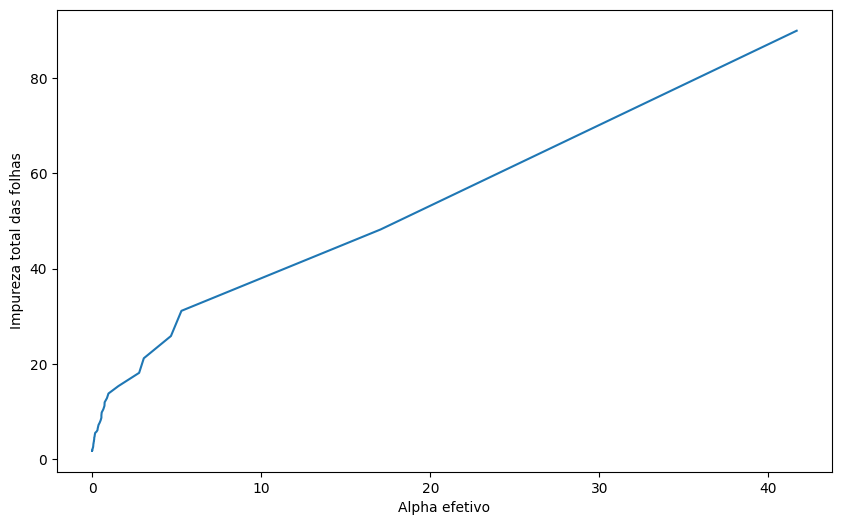

In [12]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [13]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

Text(0, 0.5, 'Profundidade da árvore')

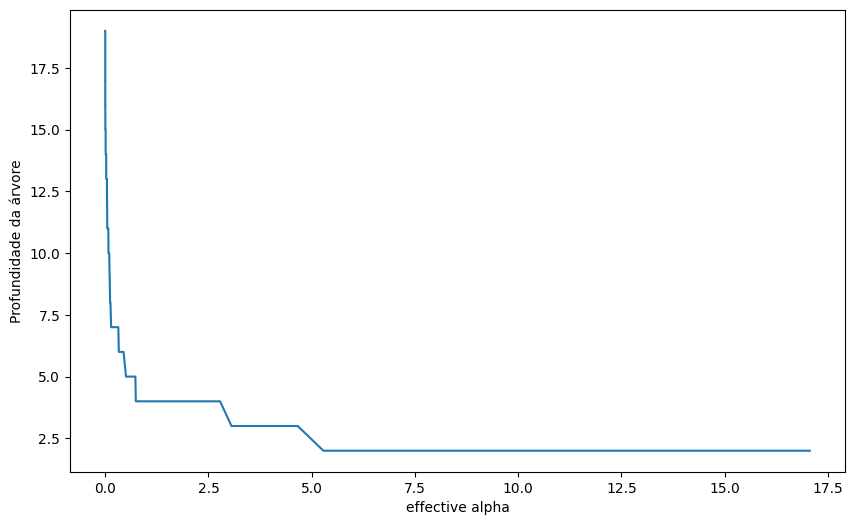

In [14]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

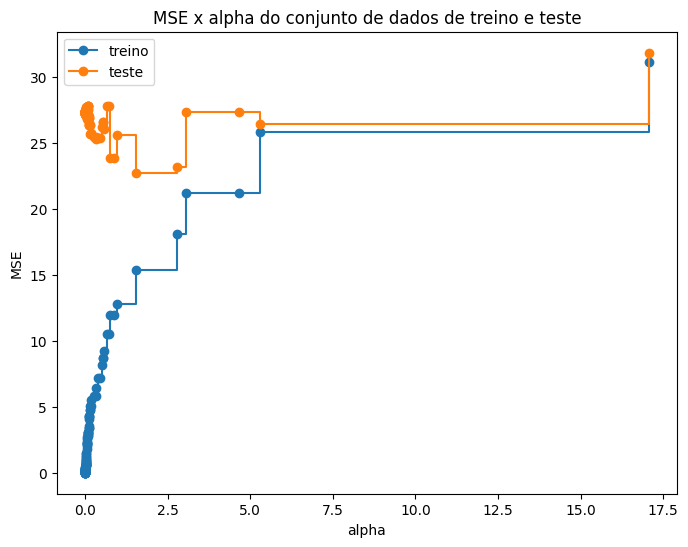

In [18]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [36]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=2)
arvore_final.fit(X_train, y_train)

print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'R-quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}')

Profundidade: 4
R-quadrado na base de testes: 0.67
MSE na base de testes: 22.70


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [38]:
regr_5 = DecisionTreeRegressor(max_depth=4)

regr_5.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [39]:
mse5 = regr_5.score(X_train, y_train)

template = "O R-quadrado da árvore de treinamento com profundidade={0} é: {1:.2f}"

print(template.format(regr_5.get_depth(),mse5).replace(".",","))

O R-quadrado da árvore de treinamento com profundidade=4 é: 0,89


### 7. Visualize esta árvore.

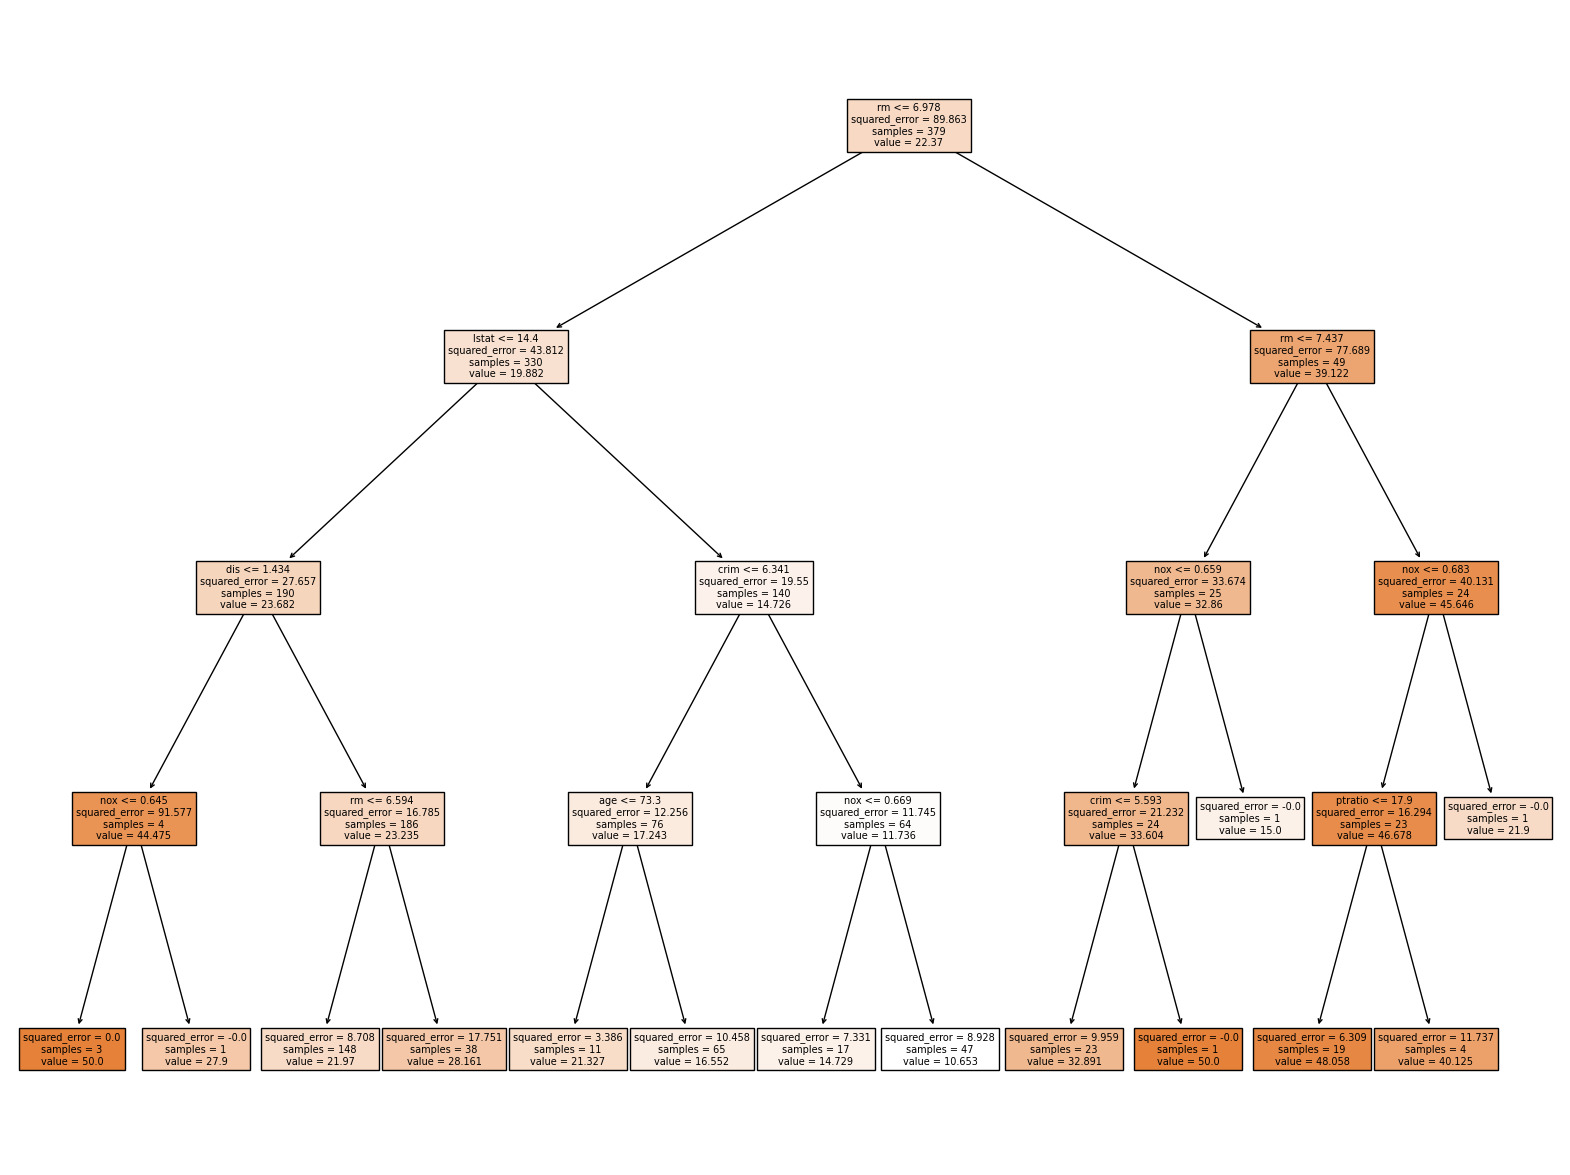

In [43]:
plt.rc('figure', figsize=(20, 15))
tp = tree.plot_tree(regr_5,
                    feature_names=X.columns,
                    filled=True)